### Directions
 - Install the scikit-learn library.
 - Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.
 - Clean your data so that it’s ready for analysis.
 - Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
 - State your hypothesis in a markdown cell within your Jupyter notebook.
 - Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
 - Split the data into two sets: a training set and a test set.
 - Run a linear regression on the data.
 - First, fit the model you created to the training set.
 - Then, create a prediction for y on the test set.
 - Create a plot that shows the regression line on the test set.
 - Write your own interpretation of how well the line appears to fit the data in a markdown cell.
 - Check the model performance statistics—MSE and R2 score.
 - Compare the predicted y values with the actual y values in a dataframe.
 - Include your thoughts on how well the model performed on the test set in a markdown cell.
 - Include any reflections you have on the impact of possible data bias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Install the scikit-learn library.
#### Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.
#### Clean your data so that it’s ready for analysis.

In [10]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [11]:
### Create datapath to Final Project Folder - Data
datapath = r'/Users/gabrielconfrey/Desktop/Data Analysis/Career Foundry/Achievement 6/Final Project/Data'

In [12]:
### Importing dataset
df = pd.read_pickle(os.path.join(datapath, '2. Cleaned', 'for64clean.pkl'))

In [13]:
df.head()

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income
0,Abington,2021,500000,house_price,Plymouth,NaN,73,5798,78395
1,Abington,2020,432750,house_price,Plymouth,NaN,73,5798,78395
2,Abington,2019,385000,house_price,Plymouth,16668.0,73,5798,78395
3,Abington,2018,395000,house_price,Plymouth,16532.0,73,5798,78395
4,Abington,2016,345000,house_price,Plymouth,16335.0,73,5798,78395


In [14]:
### Importing dataset
df_home = pd.read_pickle(os.path.join(datapath, '2. Cleaned', 'house_priceONLY.pkl'))

In [15]:
df_home['Type'].value_counts()

Type
house_price    935
Name: count, dtype: int64

In [16]:
df['Type'].value_counts()

Type
Br2_rent       4840
Br3_rent       4840
Br4_rent       4840
house_price     935
Name: count, dtype: int64

### df_home is a subset that only includes house prices that are bought, not rented. A larger analysis may look at how home prices/values compare to rentals, but for now I want to analyze just the houses.

### Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
### State your hypothesis in a markdown cell within your Jupyter notebook.

In [17]:
df_home.columns

Index(['Town', 'Year', 'Value', 'Type', 'County', 'Population',
       '2011 % Homeowners', '2019 # Households',
       '2019 Median Household Income'],
      dtype='object')

In [27]:
df_home.shape

(935, 9)

In [20]:
df_home.isnull().sum()

Town                              0
Year                              0
Value                             0
Type                              0
County                            0
Population                      269
2011 % Homeowners                 0
2019 # Households                 0
2019 Median Household Income      0
dtype: int64

In [21]:
dups = df_home.duplicated()

In [22]:
dups.shape

(935,)

<Axes: xlabel='Population', ylabel='Count'>

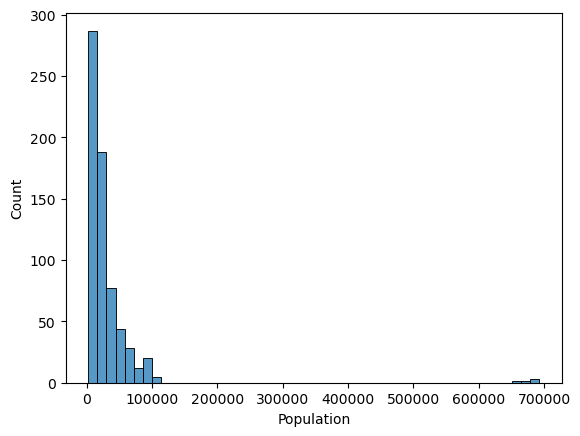

In [24]:
sns.histplot(df_home['Population'], bins=50)

### Some clear outliers above 600k, but this may be important info and I'm hesitant to remove it.

<Axes: xlabel='2011 % Homeowners', ylabel='Count'>

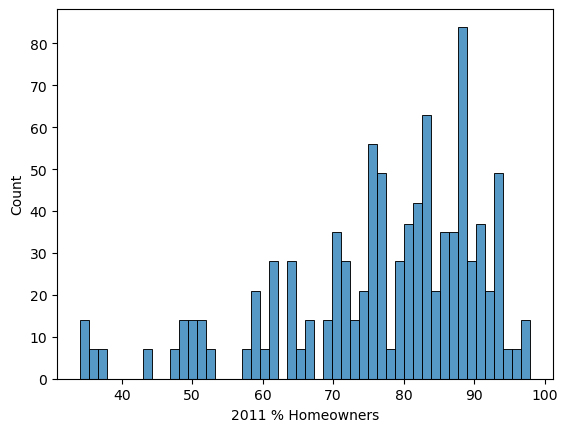

In [25]:
sns.histplot(df_home['2011 % Homeowners'], bins=50)

### No clear outliers, but a very obvious tail. Most of the towns have well over 50% homeownership.

<Axes: xlabel='2019 Median Household Income', ylabel='Count'>

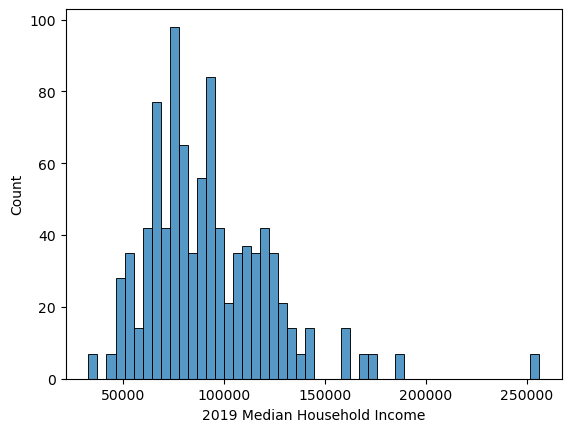

In [26]:
sns.histplot(df_home['2019 Median Household Income'], bins=50)

### A very clear outlier near 250,000; this was found in a previous analysis. It shows a town west of Boston that unexpectedly has very high income. Could prove useful in future analysis as it contextualizes the surroundings towns/municipalities.

### I want to compare
1) Population and % Homeowners
2) Population and Household Income
3) Homeowners and Household Income

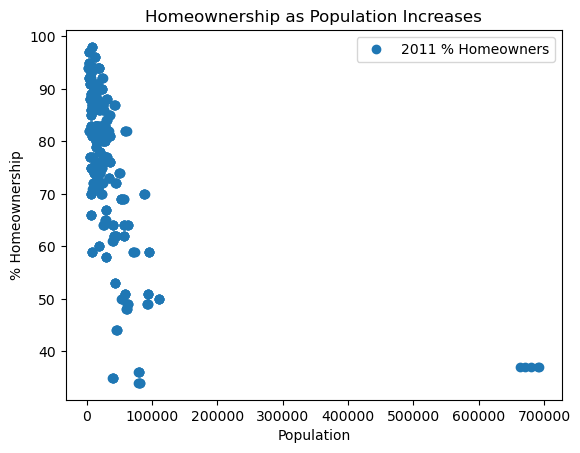

In [39]:
df_home.plot(x = 'Population', y='2011 % Homeowners',style='o')
plt.title('Homeownership as Population Increases')  
plt.xlabel('Population')  
plt.ylabel('% Homeownership')  
plt.show()

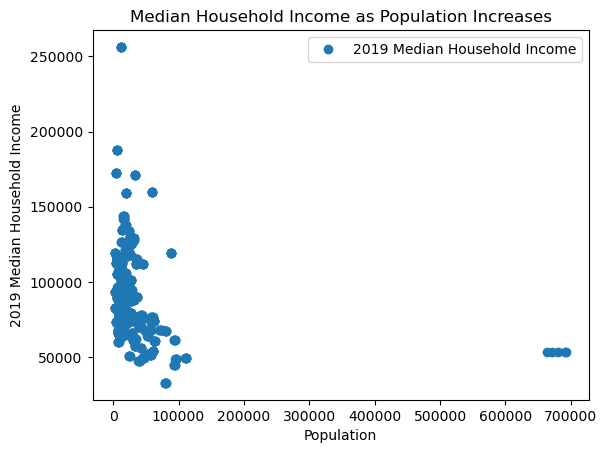

In [40]:
df_home.plot(x = 'Population', y='2019 Median Household Income',style='o')
plt.title('Median Household Income as Population Increases')  
plt.xlabel('Population')  
plt.ylabel('2019 Median Household Income')  
plt.show()

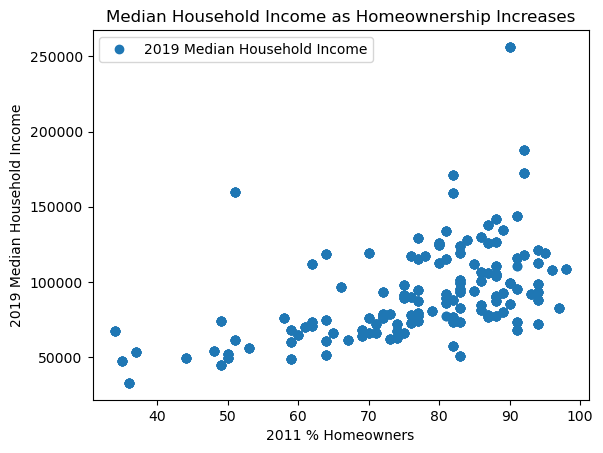

In [41]:
df_home.plot(x = '2011 % Homeowners', y='2019 Median Household Income',style='o')
plt.title('Median Household Income as Homeownership Increases')  
plt.xlabel('2011 % Homeowners')  
plt.ylabel('2019 Median Household Income')  
plt.show()

# Hypothesis: As Population increases, Homeownership decreases.

 - Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
 - Split the data into two sets: a training set and a test set.
 - Run a linear regression on the data.
 - First, fit the model you created to the training set.
 - Then, create a prediction for y on the test set.
 - Create a plot that shows the regression line on the test set.
 - Write your own interpretation of how well the line appears to fit the data in a markdown cell.
 - Check the model performance statistics—MSE and R2 score.
 - Compare the predicted y values with the actual y values in a dataframe.
 - Include your thoughts on how well the model performed on the test set in a markdown cell.
 - Include any reflections you have on the impact of possible data bias.

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_home['Population'].values.reshape(-1,1)
y = df_home['2011 % Homeowners'].values.reshape(-1,1)

In [43]:
X

array([[    nan],
       [    nan],
       [ 16668.],
       [ 16532.],
       [ 16335.],
       [ 16266.],
       [    nan],
       [    nan],
       [    nan],
       [ 23662.],
       [ 23675.],
       [ 23607.],
       [ 23488.],
       [ 23256.],
       [    nan],
       [    nan],
       [ 36356.],
       [ 36285.],
       [ 35451.],
       [ 35292.],
       [ 35014.],
       [    nan],
       [    nan],
       [ 45531.],
       [ 45489.],
       [ 45224.],
       [ 44910.],
       [ 44614.],
       [    nan],
       [    nan],
       [  3219.],
       [  3224.],
       [  3204.],
       [  3202.],
       [  3194.],
       [    nan],
       [    nan],
       [ 17807.],
       [ 17811.],
       [ 17587.],
       [ 17565.],
       [ 17339.],
       [    nan],
       [    nan],
       [ 45237.],
       [ 45162.],
       [ 44418.],
       [ 44304.],
       [ 44130.],
       [    nan],
       [    nan],
       [  4549.],
       [  4505.],
       [  4482.],
       [  4459.],
       [  

In [44]:
y

array([[73],
       [73],
       [73],
       [73],
       [73],
       [73],
       [73],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [62],
       [62],
       [62],
       [62],
       [62],
       [62],
       [62],
       [97],
       [97],
       [97],
       [97],
       [97],
       [97],
       [97],
       [83],
       [83],
       [83],
       [83],
       [83],
       [83],
       [83],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [72],
       [82],
       [82],
       [82],
       [82],
       [82],
       [82],
       [82],
       [59],
       [59],
       [59],
       [59],
       [59],
       [59],
       [59],
       [80],
       [80],
       [80],
       [80],
       [80],
       [80],
       [80],
       [64],
       [64],
       [64],
       [64],
       [64],
       [64],
       [64],

In [45]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [46]:
regression = LinearRegression()

In [47]:
regression.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Looks like I'm running into an issue with my missing Population values. I need to subset non-missing only.

In [48]:
df_home.isnull().sum()

Town                              0
Year                              0
Value                             0
Type                              0
County                            0
Population                      269
2011 % Homeowners                 0
2019 # Households                 0
2019 Median Household Income      0
dtype: int64

In [49]:
df_home.dropna(subset=['Population'], inplace=True)

In [50]:
df_home.isnull().sum()

Town                            0
Year                            0
Value                           0
Type                            0
County                          0
Population                      0
2011 % Homeowners               0
2019 # Households               0
2019 Median Household Income    0
dtype: int64

## Let's try the regression again

In [51]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_home['Population'].values.reshape(-1,1)
y = df_home['2011 % Homeowners'].values.reshape(-1,1)

In [52]:
X

array([[ 16668.],
       [ 16532.],
       [ 16335.],
       [ 16266.],
       [ 23662.],
       [ 23675.],
       [ 23607.],
       [ 23488.],
       [ 23256.],
       [ 36356.],
       [ 36285.],
       [ 35451.],
       [ 35292.],
       [ 35014.],
       [ 45531.],
       [ 45489.],
       [ 45224.],
       [ 44910.],
       [ 44614.],
       [  3219.],
       [  3224.],
       [  3204.],
       [  3202.],
       [  3194.],
       [ 17807.],
       [ 17811.],
       [ 17587.],
       [ 17565.],
       [ 17339.],
       [ 45237.],
       [ 45162.],
       [ 44418.],
       [ 44304.],
       [ 44130.],
       [  4549.],
       [  4505.],
       [  4482.],
       [  4459.],
       [  4461.],
       [  8196.],
       [  8140.],
       [  8084.],
       [  7999.],
       [  7920.],
       [ 14123.],
       [ 14162.],
       [ 14126.],
       [ 14082.],
       [ 14003.],
       [ 26116.],
       [ 26223.],
       [ 26299.],
       [ 25608.],
       [ 25553.],
       [ 42174.],
       [ 4

In [53]:
y

array([[73],
       [73],
       [73],
       [73],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [62],
       [62],
       [62],
       [62],
       [62],
       [97],
       [97],
       [97],
       [97],
       [97],
       [83],
       [83],
       [83],
       [83],
       [83],
       [72],
       [72],
       [72],
       [72],
       [72],
       [82],
       [82],
       [82],
       [82],
       [82],
       [59],
       [59],
       [59],
       [59],
       [59],
       [80],
       [80],
       [80],
       [80],
       [80],
       [64],
       [64],
       [64],
       [64],
       [64],
       [62],
       [62],
       [62],
       [62],
       [62],
       [87],
       [87],
       [87],
       [87],
       [87],
       [37],
       [37],
       [37],
       [37],
       [37],
       [77],
       [77],
       [77],
       [77],
       [77],
       [98],
       [98],
       [98],

In [54]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [55]:
regression = LinearRegression()

In [56]:
regression.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

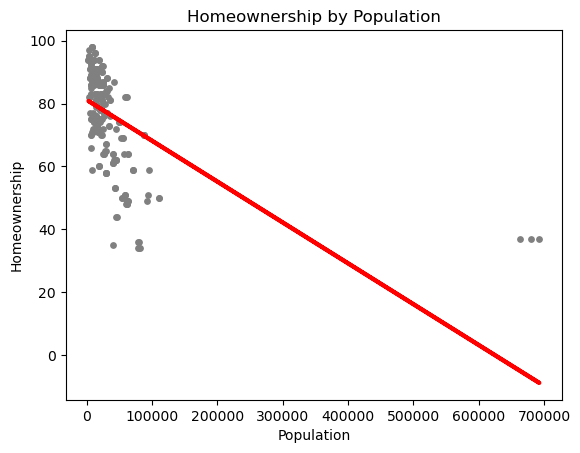

In [59]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Homeownership by Population')
plot_test.xlabel('Population')
plot_test.ylabel('Homeownership')
plot_test.show()

### The line does NOT fit the data at all. However, I suspect that without the three outlier towns, it might fit better.

In [60]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [61]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00012994]]
Mean squared error:  179.50607704086121
R2 score:  0.20166141215362154


In [63]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,83,77.956280
1,96,79.507154
2,62,75.280097
3,94,78.655505
4,98,80.126204
5,81,79.311070
6,70,78.234879
7,75,80.355424
8,92,78.061664
9,70,69.678239


### The model did not perform well, but I'm going to rerun it without the outlier data.

In [66]:
df_home = df_home[df_home.Population > 200000]

In [67]:
df_home['Population'].value_counts()

Population
692600.0    1
691147.0    1
679848.0    1
670491.0    1
662855.0    1
Name: count, dtype: int64

### Messed up, reimporting as different df name

In [68]:
### Importing dataset
df_hum = pd.read_pickle(os.path.join(datapath, '2. Cleaned', 'house_priceONLY.pkl'))

In [69]:
df_hum.dropna(subset=['Population'], inplace=True)

In [70]:
df_hum.isnull().sum()

Town                            0
Year                            0
Value                           0
Type                            0
County                          0
Population                      0
2011 % Homeowners               0
2019 # Households               0
2019 Median Household Income    0
dtype: int64

In [72]:
df_hum.head()

,Town,Year,Value,Type,County,Population,2011 % Homeowners,2019 # Households,2019 Median Household Income
2,Abington,2019,385000,house_price,Plymouth,16668.0,73,5798,78395
3,Abington,2018,395000,house_price,Plymouth,16532.0,73,5798,78395
4,Abington,2016,345000,house_price,Plymouth,16335.0,73,5798,78395
5,Abington,2015,319450,house_price,Plymouth,16266.0,73,5798,78395
9,Acton,2019,630000,house_price,Middlesex,23662.0,81,4150,133931


In [73]:
df_hum_small = df_hum[df_hum['Population'] < 200000]  

In [75]:
df_hum_small['Population'].max()

111362.0

### Let's try the regression again.

In [76]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_hum_small['Population'].values.reshape(-1,1)
y = df_hum_small['2011 % Homeowners'].values.reshape(-1,1)

In [77]:
X

array([[ 16668.],
       [ 16532.],
       [ 16335.],
       [ 16266.],
       [ 23662.],
       [ 23675.],
       [ 23607.],
       [ 23488.],
       [ 23256.],
       [ 36356.],
       [ 36285.],
       [ 35451.],
       [ 35292.],
       [ 35014.],
       [ 45531.],
       [ 45489.],
       [ 45224.],
       [ 44910.],
       [ 44614.],
       [  3219.],
       [  3224.],
       [  3204.],
       [  3202.],
       [  3194.],
       [ 17807.],
       [ 17811.],
       [ 17587.],
       [ 17565.],
       [ 17339.],
       [ 45237.],
       [ 45162.],
       [ 44418.],
       [ 44304.],
       [ 44130.],
       [  4549.],
       [  4505.],
       [  4482.],
       [  4459.],
       [  4461.],
       [  8196.],
       [  8140.],
       [  8084.],
       [  7999.],
       [  7920.],
       [ 14123.],
       [ 14162.],
       [ 14126.],
       [ 14082.],
       [ 14003.],
       [ 26116.],
       [ 26223.],
       [ 26299.],
       [ 25608.],
       [ 25553.],
       [ 42174.],
       [ 4

In [78]:
y

array([[73],
       [73],
       [73],
       [73],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [81],
       [62],
       [62],
       [62],
       [62],
       [62],
       [97],
       [97],
       [97],
       [97],
       [97],
       [83],
       [83],
       [83],
       [83],
       [83],
       [72],
       [72],
       [72],
       [72],
       [72],
       [82],
       [82],
       [82],
       [82],
       [82],
       [59],
       [59],
       [59],
       [59],
       [59],
       [80],
       [80],
       [80],
       [80],
       [80],
       [64],
       [64],
       [64],
       [64],
       [64],
       [62],
       [62],
       [62],
       [62],
       [62],
       [87],
       [87],
       [87],
       [87],
       [87],
       [77],
       [77],
       [77],
       [77],
       [77],
       [98],
       [98],
       [98],
       [98],
       [98],
       [77],
       [77],
       [77],

In [79]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [80]:
regression = LinearRegression()

In [81]:
regression.fit(X_train, y_train)

LinearRegression()

In [82]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

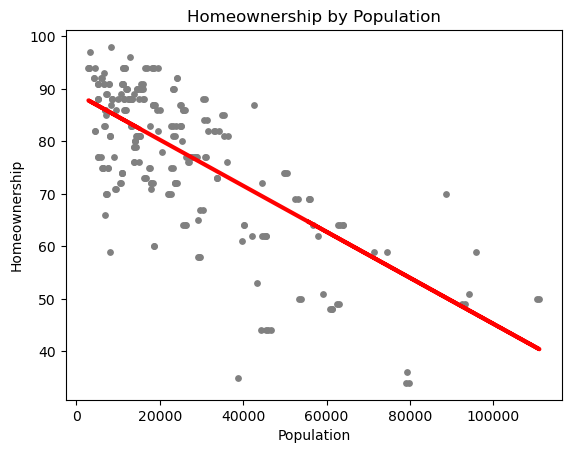

In [83]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Homeownership by Population')
plot_test.xlabel('Population')
plot_test.ylabel('Homeownership')
plot_test.show()

In [84]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [85]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0004384]]
Mean squared error:  87.3664066844846
R2 score:  0.5165786038337438


In [86]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,81,82.547425
1,91,86.854233
2,62,69.120215
3,77,76.631702
4,50,40.621808
5,81,82.804764
6,88,86.822230
7,70,85.888445
8,64,64.163265
9,76,82.527697


## Without the outliers, the R2 score was SIGNIFICANTLY better, but still not great, at .52. This likely means there is a soft correlation between Population and % Homeownership, but the relationship may not be predictive.